In [1]:
import pandas
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import datetime

Text(0.5, 1.0, 'Tracé de x(t) ajusté avec un modèle linéaire')

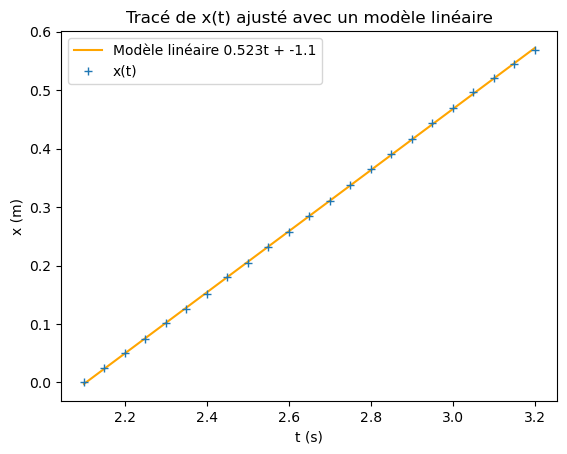

In [57]:
def lin_model(x, a, b):
    return a*x + b


data2 = pandas.read_csv("data/parabole.csv").to_numpy()

t = data2[:, 0]
x = data2[:, 1]
y = data2[:, 2]

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=lin_model, xdata=t, ydata=x)
[ax, bx] = popt

t_model = np.linspace(min(t), max(t), 1000)
x_model = lin_model(t_model, ax, bx)

plt.plot(t_model, x_model, label=f"Modèle linéaire {ax:.3}t + {bx:.3}", color='orange')
plt.plot(t, x, label="x(t)", marker="+", linestyle="none", color="tab:blue")
#plt.plot(t, y, label="y(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.title("Tracé de x(t) ajusté avec un modèle linéaire")

#plt.savefig(f'figures/x(t){str(datetime.datetime.now())}.png', dpi=300, format='png', transparent=True)

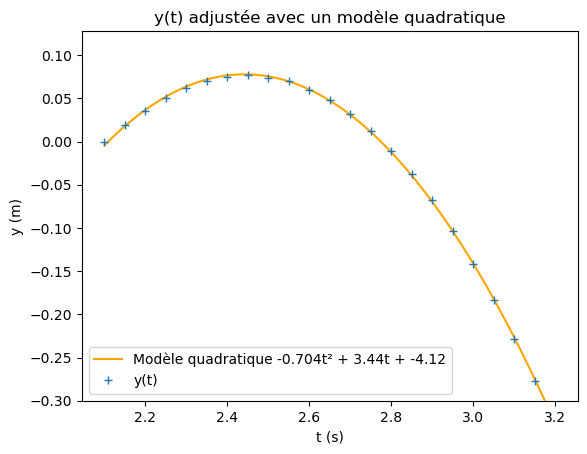

In [58]:
def quad_model(x, a, b, c):
    return a*x**2 + b*x + c

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=quad_model, xdata=t, ydata=y)
[ay, by, cy] = popt

y_model = quad_model(t_model, ay, by, cy)

plt.plot(t_model, y_model, label=f"Modèle quadratique {ay:.3}t² + {by:.3}t + {cy:.3}", color='orange')
plt.plot(t, y, label="y(t)", marker="+", linestyle="none", color='tab:blue')
plt.title("y(t) adjustée avec un modèle quadratique")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.ylim(-0.3, max(y_model)+0.05)
plt.legend()


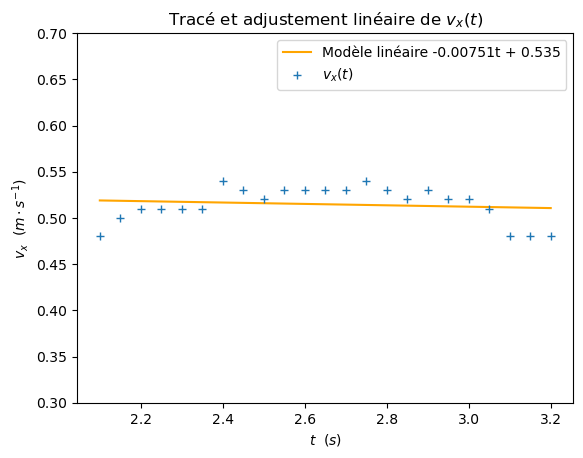

In [59]:
def finite_diff_grad(X, T):
    dX = np.zeros(len(X))
    for i in range(len(X)):
        if i == 0:
            dX[i] = (X[i] - X[i+1])/(T[i] - T[i+1])
            continue
        elif i == len(X)-1:
            dX[i] = (X[i] - X[i-1])/(T[i] - T[i-1])
            continue
        dX[i] = (X[i-1] - X[i+1])/(T[i-1] - T[i+1])
    return dX

v_x = finite_diff_grad(x, t)

[a_vx, b_vx], pcov = curve_fit(f=lin_model, xdata=t, ydata=v_x)
vx_model = lin_model(t_model, a_vx, b_vx)
plt.plot(t_model, vx_model, label=f"Modèle linéaire {a_vx:.3}t + {b_vx:.3}", color='orange')
plt.plot(t, v_x, color='tab:blue', linestyle='none', marker='+', label="$v_x(t)$")   
plt.ylim(0.3, 0.7) 
plt.ylabel("$v_x$  $(m\cdot s^{-1})$")
plt.xlabel("$t$  $(s)$")
plt.title("Tracé et adjustement linéaire de $v_x(t)$")
plt.legend()

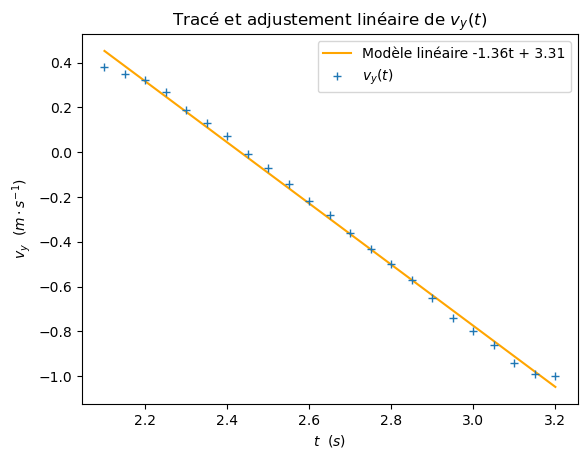

In [60]:
v_y = finite_diff_grad(y, t)

[a_vy, b_vy], pcov = curve_fit(f=lin_model, xdata=t, ydata=v_y)
vy_model = lin_model(t_model, a_vy, b_vy)
plt.plot(t_model, vy_model, label=f"Modèle linéaire {a_vy:.3}t + {b_vy:.3}", color='orange')
plt.plot(t, v_y, color='tab:blue', linestyle='none', marker='+', label="$v_y(t)$")   
#plt.ylim(0.3, 0.7) 
plt.ylabel("$v_y$  $(m\cdot s^{-1})$")
plt.xlabel("$t$  $(s)$")
plt.title("Tracé et adjustement linéaire de $v_y(t)$")
plt.legend()

5.215908570454124


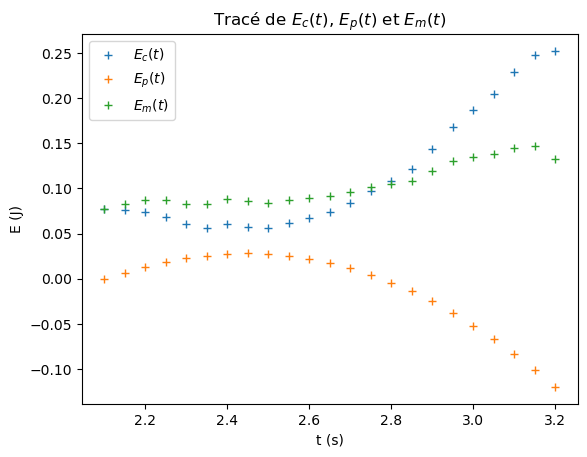

In [63]:
v_norm_carré = v_x**2 + v_y**2
m = 0.41 #kg

alpha = np.arcsin(56/616)

print(alpha*180/np.pi)

E_c = 0.5*m*v_norm_carré
#E_c = 0.5*m*v_x[0]**2 + 0.5*m*(-9.81*np.sin(alpha)*t + v_y[0])**2
E_p = m*9.81*np.sin(alpha)*y
#E_p = -0.5*(m*9.81**2*np.sin(alpha)**2)*t**2 + m*9.81*v_y[0]*np.sin(alpha)*t
E_m = E_c + E_p
plt.plot(t, E_c, marker='+', linestyle="none",label="$E_c(t)$")
plt.plot(t, E_p, marker='+', linestyle="none", label="$E_p(t)$")
plt.plot(t, E_m, marker='+', linestyle="none", label="$E_m(t)$")
plt.ylabel("E (J)")
plt.xlabel("t (s)")
plt.title("Tracé de $E_c(t)$, $E_p(t)$ et $E_m(t)$")

plt.legend()
